In [38]:
import pandas as pd

In [39]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [40]:
import plotly 
import plotly.express as px

In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.style.use('default')

In [43]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [44]:
churn_df = churn_data.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in churn_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, churn_df[col].nunique(),churn_df[col].dtype) 
    # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Gender,2,object
1,HasCrCard,2,int64
2,IsActiveMember,2,int64
3,Exited,2,int64
4,Geography,3,object
5,NumOfProducts,4,int64
6,Tenure,11,int64
7,Age,70,int64
8,CreditScore,460,int64
9,Surname,2932,object


In [46]:
cols_to_exclude = ['CustomerId','RowNumber','EstimatedSalary','Balance','Surname','CreditScore','Age','Exited'] 
for col in churn_df.columns: 
    if col not in cols_to_exclude: 
        churn_df[col] = churn_df[col].astype('category') 
display(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  int64   
 1   CustomerId       10000 non-null  int64   
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  category
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  category
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  int64   
dtypes: category(6), float64(2), int64(5), object(1)
memory usage: 684.8+ KB


None

In [47]:
churn_df['IsActiveMember_cat'] = churn_df['IsActiveMember'].astype('category')
churn_df['IsActiveMember_cat'] = churn_df['IsActiveMember_cat'].cat.rename_categories({
    0:'Неактивный клиент',
    1:'Активный клиент'
})

In [48]:
churn_df['Exited_cat'] = churn_df['Exited'].astype('category')
churn_df['Exited_cat'] = churn_df['Exited_cat'].cat.rename_categories({
    0:'Лояльный клиент',
    1:'Ушедший клиент'
})

Text(0, 0.5, 'Количество клиентов')

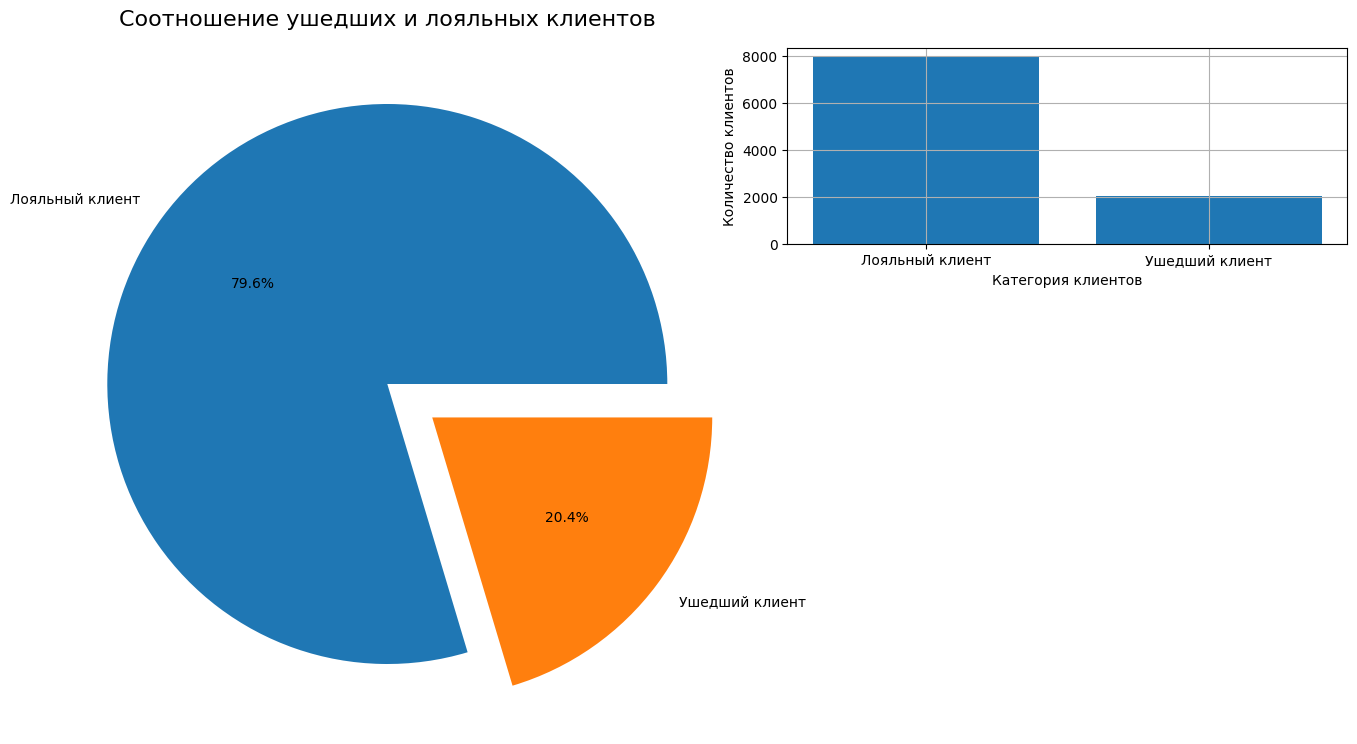

In [49]:
from turtle import width


exited_combinations = churn_df['Exited_cat'].value_counts()
exited_combinations

fig = plt.figure(figsize=(20,7))
pieplot = fig.add_axes([0,0,1,1])
pieplot.pie(
    x=exited_combinations,
    labels=exited_combinations.index,
    autopct='%.1f%%',
    explode=[0,0.2]
)
barplot = fig.add_axes([0.7,0.7,0.28,0.28])
barplot.bar(
    x=exited_combinations.index,
    height=exited_combinations,
)
pieplot.set_title('Cоотношение ушедших и лояльных клиентов',fontsize =16)
barplot.grid(True)
barplot.set_xlabel('Категория клиентов')
barplot.set_ylabel('Количество клиентов')

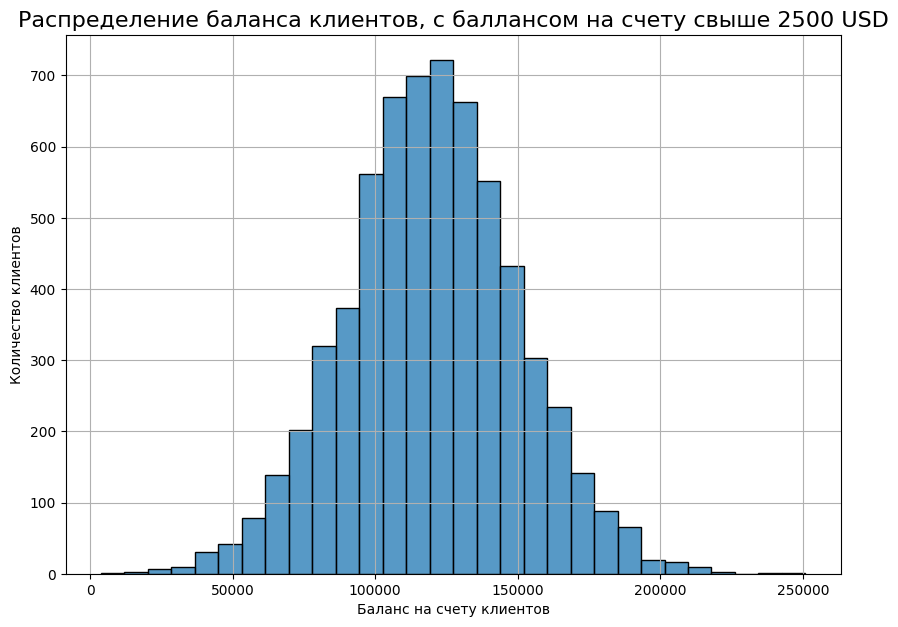

In [51]:
histogramm_data = churn_df[churn_df['Balance']>2500]

fig = plt.figure(figsize=(10,7))
histogramm = sns.histplot(
    data=histogramm_data,
    x='Balance',
    bins = 30
)
histogramm.set_title('Распределение баланса клиентов, с баллансом на счету свыше 2500 USD',fontsize =16)
histogramm.set_xlabel('Баланс на счету клиентов')
histogramm.set_ylabel('Количество клиентов')
histogramm.grid()

In [52]:
fig = px.box(
    data_frame=churn_df,
    x='Balance',
    y='Exited_cat',
    title='Распределение баланса клиентов в разрезе признака оттока',
)
fig.update_layout(
    xaxis=dict(title=dict(text='Балланс на счету клиентов')),
    yaxis=dict(title=dict(text='Категория клиентов'))
)
fig.show()

In [53]:
fig = px.box(
    data_frame=churn_df,
    x='Age',
    y='Exited_cat',
    title='Распределение возраста клиентов в разрезе признака оттока'
)
fig.update_layout(
    xaxis=dict(title=dict(text='Возраст клиентов')),
    yaxis=dict(title=dict(text='Категория клиентов'))
)
fig.show()

In [54]:
fig = px.scatter(
    data_frame=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    color='Exited_cat',
    log_x=False,
    log_y=True,
    height=500,
    width=1000
)
fig.update_layout(
    xaxis=dict(title=dict(text='Кредитный рейтинг клиентов')),
    yaxis=dict(title=dict(text='Предпологаемая зарплата клиентов'))
)
fig.show()

In [55]:
bar_data_gender = churn_data.groupby(by='Gender',as_index=False)['Exited'].mean().round(2)
fig = px.bar(
    data_frame=bar_data_gender,
    x='Gender',
    y='Exited',
    color='Gender',
    title='Отток клиентов в разрезе гендерного признака',
)
fig.update_layout(
    xaxis=dict(title=dict(text='Пол клиентов')),
    yaxis=dict(title=dict(text='Признак оттока клиентов'))
)
fig.show()

In [56]:
bar_data_numofproducts = churn_df.pivot_table(values='CustomerId', index='NumOfProducts', columns='Exited_cat',aggfunc='count')
fig = px.bar(
    data_frame=bar_data_numofproducts,
    barmode='group',
    title='Зависимость оттока клиентов от числа приобретённых у банка услуг',
)
fig.update_layout(
    xaxis=dict(title=dict(text='Количество приобретенных продуктов')),
    yaxis=dict(title=dict(text='Количество клиентов'))
)
fig.show()

In [57]:
bar_data_isactivemember = churn_df.groupby(['IsActiveMember_cat','Exited_cat'],as_index=False).count()
bar_data_isactivemember
fig = px.bar(
    data_frame=bar_data_isactivemember,
    x='IsActiveMember_cat',
    y='RowNumber',
    color='Exited_cat',
    title='Активность клиентов'
)
fig.update_layout(
    xaxis=dict(title=dict(text='Статус активности клиентов')),
    yaxis=dict(title=dict(text='Количество клиентов'))
)
fig.show()


In [58]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveMember_cat,Exited_cat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Активный клиент,Ушедший клиент
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Активный клиент,Лояльный клиент
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Неактивный клиент,Ушедший клиент
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Неактивный клиент,Лояльный клиент
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Активный клиент,Лояльный клиент


In [69]:
churn_df_choroplex = churn_df.groupby('Geography',as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=churn_df_choroplex,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    range_color=[0,0.5],
    color_continuous_scale='Reds',
    title='Отток клиентов по странам'
)

fig.show()

Text(50.722222222222214, 0.5, 'Кредитный рейтинг')

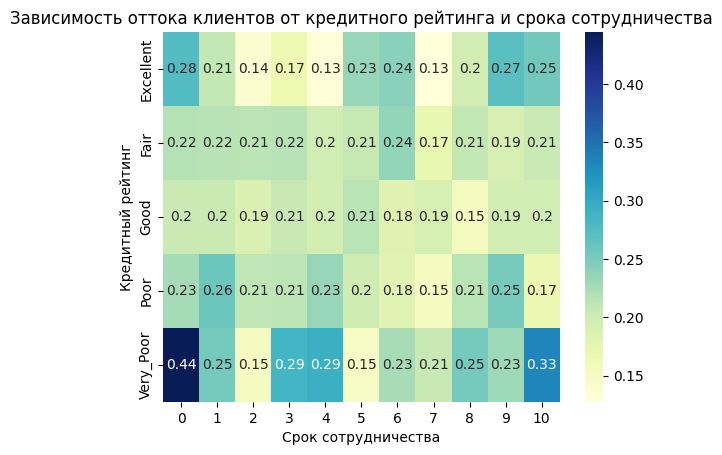

In [79]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

heatmap = sns.heatmap(
    data=pivot,
    annot=True,
    cmap='YlGnBu'
)
heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга и срока сотрудничества',fontsize =12)
heatmap.set_xlabel('Срок сотрудничества')
heatmap.set_ylabel('Кредитный рейтинг')